# Collaborative filtering using a neural network

Start by using code from https://python.plainenglish.io/collaborative-filtering-recommendation-system-using-tensorflow-with-neural-net-7f8dba4521da and see if can get something similar working for our data and then progress from there

### Install and import Neccessary Libraries

In [56]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow
!pip install scikit-learn


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

### Import our Testing and Training split

I'll focus on just the global split for now and do comparison later.

In [58]:
global_train_df = pd.read_csv('../Katherine W/dataSets/global_train_df.csv')
global_test_df = pd.read_csv('../Katherine W/dataSets/global_test_df.csv')

In [59]:
global_train_df.head()

,User ID,Item ID,Rating,timestamp,Age,Gender,Occupation,zip code,Movie Title,Release Date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,864,1044,3,888891049,27,M,programmer,63021,"Paper, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,864,159,4,888891049,27,M,programmer,63021,Basic Instinct (1992),01-Jan-1992,...,0,0.0,0,0,1.0,0,0,1.0,0,0
2,864,1303,2,888890997,27,M,programmer,63021,"Getaway, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,864,184,4,888890775,27,M,programmer,63021,Army of Darkness (1993),01-Jan-1993,...,0,0.0,1,0,0.0,0,1,0.0,0,0
4,864,1531,3,888890690,27,M,programmer,63021,Far From Home: The Adventures of Yellow Dog (1...,01-Jan-1995,...,0,0.0,0,0,0.0,0,0,0.0,0,0


### Building Initial model

Here we use only the user id and item id as features for the movie rating for simplicity

In [60]:
# Define the number of unique users and items in the dataset
num_users = global_train_df['User ID'].max()
num_items = global_train_df['Item ID'].max()

# Define the embedding size
embedding_size = 50

# Define the input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

# Define the embedding layers
user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items + 1, output_dim=embedding_size, name='item_embedding')(item_input)

# Flatten the embedding layers
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

# Concatenate the user and item vectors
concat = Concatenate()([user_vecs, item_vecs])

# Add a dense layer
dense = Dense(128, activation='relu')(concat)
output = Dense(1)(dense)

# Define the model
model = Model(inputs=[user_input, item_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

# Prepare the training data
X_train = [global_train_df['User ID'].values, global_train_df['Item ID'].values]
y_train = global_train_df['Rating'].values

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │     47,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │     84,150 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 50)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 50)        │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 100)       │          0 │ flatten_12[0][0], │
│ (Concatenate)       │                   │            │ flatten_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     12,928 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        129 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 144,407 (564.09 KB)

 Trainable params: 144,407 (564.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8791 - val_loss: 1.5528
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8924 - val_loss: 1.4848
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.8736 - val_loss: 1.3786
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.8424 - val_loss: 1.3076
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.8505 - val_loss: 1.2130
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.8229 - val_loss: 1.2615
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.8238 - val_loss: 1.1377
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.8193 - val_loss: 1.1805
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8142 - val_loss: 1.2411
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7858 - val_loss: 1.1336
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7749 - val_loss: 1.1350
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━

In [61]:
# Define the user_id and unrated_items
user_id = 1  # Example user_id, you can change it based on your dataset
rated_items = global_train_df[global_train_df['User ID'] == user_id]['Item ID'].values
all_items = global_train_df['Item ID'].unique()
unrated_items = np.setdiff1d(all_items, rated_items)

# Prepare the input data for prediction
user_input_pred = np.array([user_id] * len(unrated_items))
item_input_pred = unrated_items

# Make predictions
predictions = model.predict([user_input_pred, item_input_pred])

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Item ID': unrated_items, 'Predicted Rating': predictions.flatten()})

# Sort the predictions in descending order
predictions_df = predictions_df.sort_values(by='Predicted Rating', ascending=False)

# Get the top 10 recommendations
top_10_recommendations = predictions_df.head(10)

print(top_10_recommendations)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
     Item ID  Predicted Rating
421     1629          6.470965
432     1642          6.144537
94       856          5.918244
250     1367          5.864795
313     1467          5.816468
355     1512          5.799010
240     1357          5.696841
321     1475          5.691442
420     1628          5.663779
319     1473          5.646019


In [62]:
# Get the names of the recommended films
recommended_film_ids = top_10_recommendations['Item ID'].values
recommended_films = global_train_df[global_train_df['Item ID'].isin(recommended_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

# Get the names of the films the user has watched
watched_film_ids = rated_items
watched_films = global_train_df[global_train_df['Item ID'].isin(watched_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

print("Recommended Films:")
print(recommended_films)

print("\nWatched Films:")
print(watched_films)

Recommended Films:
       Item ID                                        Movie Title
231       1628                                    Lamerica (1994)
750       1475                          Bhaji on the Beach (1993)
758       1367                                       Faust (1994)
928       1642  Some Mothers Son (1996)|27-Dec-1996||http://us...
932       1473                        Little Princess, The (1939)
1919       856                              Night on Earth (1991)
2435      1629                                   Nico Icon (1995)
3594      1512             World of Apu, The (Apur Sansar) (1959)
12052     1357                              For the Moment (1994)
12790     1467               Saint of Fort Washington, The (1993)

Watched Films:
       Item ID                                        Movie Title
1          159                              Basic Instinct (1992)
3          184                            Army of Darkness (1993)
5            4                           

### Tuning model parameters

In [63]:
!pip install keras-tuner

In [64]:
import keras_tuner as kt

# Define a function to build the model
def build_model(hp):
    num_users = global_train_df['User ID'].max()
    num_items = global_train_df['Item ID'].max()
    
    embedding_size = hp.Int('embedding_size', min_value=10, max_value=100, step=10)
    dense_units = hp.Int('dense_units', min_value=32, max_value=256, step=32)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')
    
    user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
    item_embedding = Embedding(input_dim=num_items + 1, output_dim=embedding_size, name='item_embedding')(item_input)
    
    user_vecs = Flatten()(user_embedding)
    item_vecs = Flatten()(item_embedding)
    
    concat = Concatenate()([user_vecs, item_vecs])
    
    dense = Dense(dense_units, activation='relu')(concat)
    output = Dense(1)(dense)
    
    model = Model(inputs=[user_input, item_input], outputs=output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='hyperparam_tuning'
)

# Prepare the training data
X_train = [global_train_df['User ID'].values, global_train_df['Item ID'].values]
y_train = global_train_df['Rating'].values

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal embedding size is {best_hps.get('embedding_size')}.
The optimal number of dense units is {best_hps.get('dense_units')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

Reloading Tuner from my_dir\hyperparam_tuning\tuner0.json

The optimal embedding size is 50.
The optimal number of dense units is 192.
The optimal learning rate is 0.001.



In [65]:
# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Print the summary of the model
best_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │     47,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │     84,150 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 50)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 50)        │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 100)       │          0 │ flatten_14[0][0], │
│ (Concatenate)       │                   │            │ flatten_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 192)       │     19,392 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │        193 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 150,935 (589.59 KB)

 Trainable params: 150,935 (589.59 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Make predictions
predictions = best_model.predict([user_input_pred, item_input_pred])

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Item ID': unrated_items, 'Predicted Rating': predictions.flatten()})

# Sort the predictions in descending order
predictions_df = predictions_df.sort_values(by='Predicted Rating', ascending=False)

# Get the top 10 recommendations
top_10_recommendations = predictions_df.head(10)

print(top_10_recommendations)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0462 - val_loss: 1.9726
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0454 - val_loss: 1.9567
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0457 - val_loss: 1.9880
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0421 - val_loss: 1.9090
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0428 - val_loss: 1.9400
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0421 - val_loss: 1.9168
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0416 - val_loss: 1.9159
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0414 - val_loss: 1.9166
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0412 - val_loss: 1.9627
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0402 - val_loss: 1.9256
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.0393 - val_loss: 1.9594
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━

c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [67]:
# Get the names of the recommended films
recommended_film_ids = top_10_recommendations['Item ID'].values
recommended_films = global_train_df[global_train_df['Item ID'].isin(recommended_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

# Get the names of the films the user has watched
watched_film_ids = rated_items
watched_films = global_train_df[global_train_df['Item ID'].isin(watched_film_ids)][['Item ID', 'Movie Title']].drop_duplicates()

print("Recommended Films:")
print(recommended_films)

print("\nWatched Films:")
print(watched_films)

Recommended Films:
      Item ID                                        Movie Title
156       449               Star Trek: The Motion Picture (1979)
1020     1493                            Modern Affair, A (1995)
1350     1386                      Tetsuo II: Body Hammer (1992)
1448     1442                         Scarlet Letter, The (1995)
1919      856                              Night on Earth (1991)
2302     1639                Bitter Sugar (Azucar Amargo) (1996)
2680     1316                        Horse Whisperer, The (1998)
2833      593                                  Stalingrad (1993)
3030     1480                          Herbie Rides Again (1974)
4820     1577  Death in the Garden (Mort en ce jardin, La) (1...

Watched Films:
       Item ID                                        Movie Title
1          159                              Basic Instinct (1992)
3          184                            Army of Darkness (1993)
5            4                                  Get 

Now lets check if the recommeded films match any in our test set

In [68]:
# Get the films watched by user 1 in the test set
user_test_watched_films = global_test_df[global_test_df['User ID'] == user_id][['Item ID', 'Movie Title']].drop_duplicates()

# Check for matches between recommended films and watched films in the test set
matches = recommended_films[recommended_films['Item ID'].isin(user_test_watched_films['Item ID'])]

print("Matches between recommended films and films watched by user 1 in the test set:")
print(matches)

Matches between recommended films and films watched by user 1 in the test set:
Empty DataFrame
Columns: [Item ID, Movie Title]
Index: []


We have no matches to the films rated by user 1

In [69]:
user_test_watched_films

,Item ID,Movie Title
5679,5,Copycat (1995)
5680,171,Delicatessen (1991)
5681,242,Kolya (1996)


In [70]:
# Filter the global_test_df for the ratings given by user 1 to the films in user_test_watched_films
user_1_ratings = global_test_df[(global_test_df['User ID'] == user_id) & (global_test_df['Item ID'].isin(user_test_watched_films['Item ID']))][['Item ID', 'Rating']]

# Merge with user_test_watched_films to get the movie titles
user_1_ratings_with_titles = user_1_ratings.merge(user_test_watched_films, on='Item ID')

print(user_1_ratings_with_titles)

   Item ID  Rating          Movie Title
0        5       3       Copycat (1995)
1      171       5  Delicatessen (1991)
2      242       5         Kolya (1996)


### Look at distribution of ratings quickly

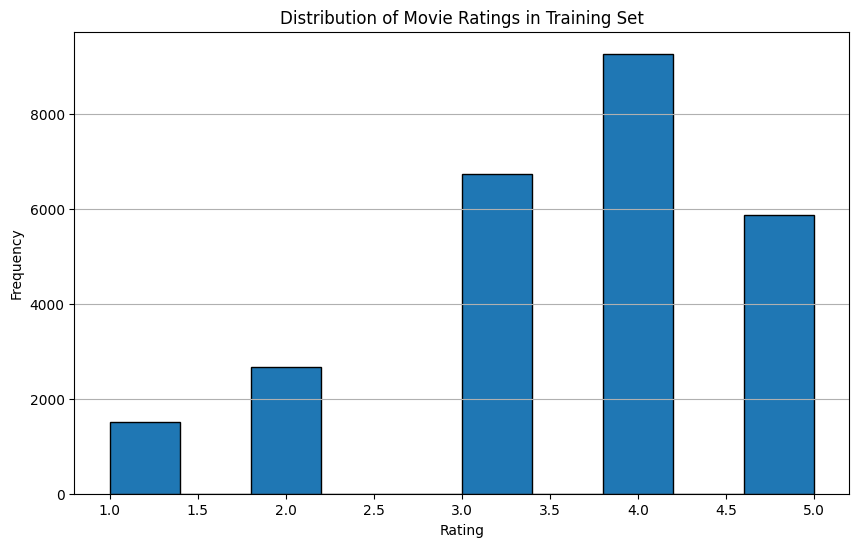

In [71]:

# Plot the distribution of movie ratings in the training set
plt.figure(figsize=(10, 6))
plt.hist(global_train_df['Rating'], edgecolor='black')
plt.title('Distribution of Movie Ratings in Training Set')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### Scale ratings for better training

In [72]:
global_train_df['Rating'] = (global_train_df['Rating'] - 1) / 4
global_test_df['Rating'] = (global_test_df['Rating'] - 1) / 4

### Incorporate more features into our model

We will also add in some more dense layers to our model

In [73]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical features
label_encoder_gender = LabelEncoder()
label_encoder_occupation = LabelEncoder()

global_train_df['Gender'] = label_encoder_gender.fit_transform(global_train_df['Gender'])
global_train_df['Occupation'] = label_encoder_occupation.fit_transform(global_train_df['Occupation'])

# Scale numerical features
scaler = MinMaxScaler()
global_train_df[['Age', 'Gender', 'Occupation']] = scaler.fit_transform(global_train_df[['Age', 'Gender', 'Occupation']])

# Define the number of unique users, items, and other features in the dataset
num_users = global_train_df['User ID'].max()
num_items = global_train_df['Item ID'].max()
num_genders = global_train_df['Gender'].nunique()
num_occupations = global_train_df['Occupation'].nunique()

# Define the embedding size
embedding_size = 50

# Define the input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')
age_input = Input(shape=(1,), name='age_input')
gender_input = Input(shape=(1,), name='gender_input')
occupation_input = Input(shape=(1,), name='occupation_input')

# Define the embedding layers
user_embedding = Embedding(input_dim=num_users + 1, output_dim=embedding_size, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items + 1, output_dim=embedding_size, name='item_embedding')(item_input)
gender_embedding = Embedding(input_dim=num_genders, output_dim=embedding_size, name='gender_embedding')(gender_input)
occupation_embedding = Embedding(input_dim=num_occupations, output_dim=embedding_size, name='occupation_embedding')(occupation_input)

# Flatten the embedding layers
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)
gender_vecs = Flatten()(gender_embedding)
occupation_vecs = Flatten()(occupation_embedding)

# Concatenate the user and item vectors with additional features
concat = Concatenate()([user_vecs, item_vecs, age_input, gender_vecs, occupation_vecs])

# Add dense layers
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
output = Dense(1)(dense3)

# Define the model
model = Model(inputs=[user_input, item_input, age_input, gender_input, occupation_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ occupation_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │     47,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │     84,150 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_embedding    │ (None, 1, 50)     │        100 │ gender_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ occupation_embeddi… │ (None, 1, 50)     │      1,050 │ occupation_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 50)        │          0 │ user_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 50)        │          0 │ item_embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 50)        │          0 │ gender_embedding… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 50)        │          0 │ occupation_embed… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 201)       │          0 │ flatten_16[0][0], │
│ (Concatenate)       │                   │            │ flatten_17[0][0], │
│                     │                   │            │ age_input[0][0],  │
│                     │                   │            │ flatten_18[0][0], │
│                     │                   │            │ flatten_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │     25,856 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │      8,256 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 168,725 (659.08 KB)

 Trainable params: 168,725 (659.08 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
def prepare_model_inputs(df):
    # Encode categorical features
    label_encoder_gender = LabelEncoder()
    label_encoder_occupation = LabelEncoder()

    df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
    df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])

    # Scale numerical features
    scaler = MinMaxScaler()
    df[['Age', 'Gender', 'Occupation']] = scaler.fit_transform(df[['Age', 'Gender', 'Occupation']])
    
    return [
        df['User ID'].values,
        df['Item ID'].values,
        df['Age'].values,
        df['Gender'].values,
        df['Occupation'].values
    ]

In [75]:
X_train = prepare_model_inputs(global_train_df)
y_train = global_train_df['Rating'].values
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'age_input', 'gender_input', 'occupation_input']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0990 - val_loss: 0.0634
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0530 - val_loss: 0.0620
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0506 - val_loss: 0.0614
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0490 - val_loss: 0.0646
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0451 - val_loss: 0.0652
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0399 - val_loss: 0.0697
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0363 - val_loss: 0.0690
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0318 - val_loss: 0.0725
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.0711
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0255 - val_loss: 0.0729
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0226 - val_loss: 0.0749
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Look for a better way to assess model performance

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
def evaluate_user_predictions(test_df, model):
    # Store results
    user_metrics = []
    
    # Group by user
    for user_id in test_df['User ID'].unique():
        # Get user's data
        user_data = test_df[test_df['User ID'] == user_id]
        
        # Prepare input for prediction
        X_user = prepare_model_inputs(user_data)
        
        # Get predictions
        predictions = model.predict(X_user).flatten()
        
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(user_data['Rating'].values, predictions))
        mae = np.mean(np.abs(user_data['Rating'] - predictions))
        
        # Store user results
        user_metrics.append({
            'user_id': user_id,
            'num_ratings': len(user_data),
            'avg_actual_rating': user_data['Rating'].mean(),
            'avg_predicted_rating': predictions.mean(),
            'rmse': rmse,
            'mae': mae
        })
    
    return pd.DataFrame(user_metrics)

In [78]:
results = evaluate_user_predictions(global_test_df, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = label_encoder_occupation.fit_transform(df['Occupation'])
C:\Users\44747\AppData\Local\Temp\ipykernel_38108\1705942158.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [79]:
results

,user_id,num_ratings,avg_actual_rating,avg_predicted_rating,rmse,mae
0,729,1,0.750000,0.697836,0.052164,0.052164
1,683,9,0.638889,0.634375,0.167491,0.153233
2,796,120,0.635417,0.597263,0.288686,0.232557
3,189,69,0.775362,0.670371,0.321716,0.267014
4,159,3,0.333333,0.668697,0.441563,0.339571
...,...,...,...,...,...,...
281,825,4,0.375000,0.828549,0.485213,0.453549
282,787,5,0.400000,0.609425,0.412942,0.374698
283,2,1,0.750000,0.520943,0.229057,0.229057
284,95,10,0.400000,0.654957,0.328602,0.273858


In [104]:
def compare_predictions_vs_actual_ratings(user_id, test_df, train_df, model):
    # Get the items the user has not watched in the training set
    rated_items = train_df[train_df['User ID'] == user_id]['Item ID'].values
    all_items = train_df['Item ID'].unique()
    unrated_items = np.setdiff1d(all_items, rated_items)

    # Prepare the input data for prediction
    user_input_pred = np.array([user_id] * len(unrated_items))
    item_input_pred = unrated_items

    # Prepare additional features for prediction
    user_data = train_df[train_df['User ID'] == user_id].iloc[0]
    age_input_pred = np.array([user_data['Age']] * len(unrated_items))
    gender_input_pred = np.array([user_data['Gender']] * len(unrated_items))
    occupation_input_pred = np.array([user_data['Occupation']] * len(unrated_items))

    # Make predictions
    predictions = model.predict([user_input_pred, item_input_pred, age_input_pred, gender_input_pred, occupation_input_pred])

    # Create a DataFrame with the predictions
    predictions_df = pd.DataFrame({'Item ID': unrated_items, 'Predicted Rating': predictions.flatten()})

    # Merge the predictions with the actual ratings from the test set
    test_ratings = test_df[test_df['User ID'] == user_id][['Item ID', 'Rating']]
    comparison_df = predictions_df.merge(test_ratings, on='Item ID', how='inner', suffixes=('_predicted', '_actual'))

    # Calculate the error
    comparison_df['Error'] = (comparison_df['Rating'] - comparison_df['Predicted Rating']) ** 2
    return comparison_df

The function seems to work to give an indication of how accurate the movie predictions are but by using the global test split a lot of users don't have any data in the test set so cant compare the performance with them

### Start using different data split

In [116]:

user_train_df = pd.read_csv('../Katherine W/dataSets/user_train_df.csv')
user_test_df = pd.read_csv('../Katherine W/dataSets/user_test_df.csv')


In [118]:
X_user_train = prepare_model_inputs(user_train_df)
y_user_train = user_train_df['Rating'].values

# Train the model with the user-specific training data
history_user = model.fit(X_user_train, y_user_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'age_input', 'gender_input', 'occupation_input']. Received: the structure of inputs=('*', '*', '*', '*', '*')
  warnings.warn(


407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2316 - val_loss: 0.6511
Epoch 2/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3959 - val_loss: 0.6287
Epoch 3/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2833 - val_loss: 0.6444
Epoch 4/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2276 - val_loss: 0.6442
Epoch 5/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1901 - val_loss: 0.6854
Epoch 6/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1597 - val_loss: 0.6828
Epoch 7/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1400 - val_loss: 0.6674
Epoch 8/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1166 - val_loss: 0.6775
Epoch 9/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1087 - val_loss: 0.6935
Epoch 10/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0939 - val_loss: 0.7106
Epoch 11/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0880 - val_loss: 0.7007
Epoch 12/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [119]:
compare_predictions_vs_actual_ratings(2, user_test_df, user_train_df, model)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


,Item ID,Predicted Rating,Rating,Error


This is not working properly as it is not giving any comparisons even though there are definitely reviews in the test set